binzrized lena


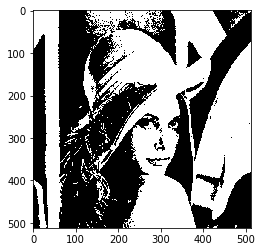

lena dilation


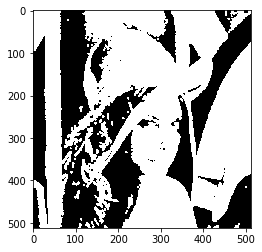

lena erosion


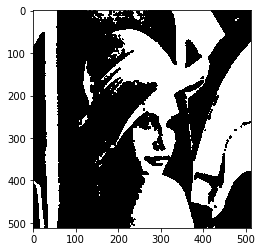

lena opening


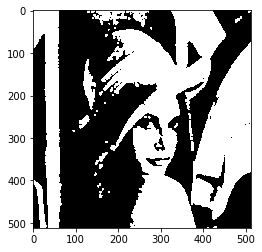

lena closing


NameError: name 'img_ed' is not defined

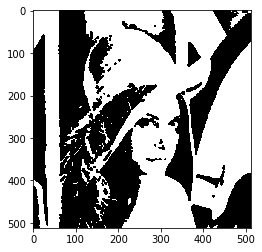

In [24]:
#!/usr/bin/env python
# coding: utf-8
# NTU CSIE, Computer Vision HW2, R08922024, Alfons Hwu

import cv2
import math, sys
import matplotlib.pyplot as plt
import numpy as np

####### IO ############
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
kernel = np.array(
    [[0, 1, 1, 1, 0], 
     [1, 1, 1, 1, 1], 
     [1, 1, 1, 1, 1], 
     [1, 1, 1, 1, 1], 
     [0, 1, 1, 1, 0]]
    )
####### binarize ######
def img_binarize(img_in):
    return (img_in > 0x7f) * 0xff

img_bin = img_binarize(img)
print('binzrized lena')
plt.imshow(img_bin, cmap = 'gray')
plt.show()

####### dilation #####
def dilation(a, b):
    ra, ca = a.shape # original image
    rb, cb = b.shape # kernel
    res = np.zeros(a.shape, dtype = 'uint8')
    
    for ai in range(ra):
        for aj in range(ca):
            if a[ai, aj] == 0xff:
                
                # assign original image position
                res[ai, aj] = 0xff
                for bi in range(rb):
                    for bj in range(cb):
                        # dialiation according to the rule
                        if b[bi, bj] and ai + bi < ra and aj + bj < ca:
                            
                            # extend the value
                            res[ai + bi, aj + bj] = 0xff 
                        
    return res 

img_dilated = dilation(img_bin, kernel)
print('lena dilation')
plt.imshow(img_dilated, cmap = 'gray')
plt.savefig('lena_dialated', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_dialated_cv.png', img_dilated)
plt.show()

####### erosion #######
def erosion(a, b):
    ra, ca = a.shape # original image
    rb, cb = b.shape # kernel
    res = np.zeros(a.shape, dtype = 'uint8')
    
    for ai in range(ra):
        for aj in range(ca):
            if a[ai, aj] == 0xff:
                
                # assign original image position
                res[ai, aj] = 0xff
                # erode the pixel or not
                ok = 1 
                for bi in range(rb):
                    for bj in range(cb):
                        # dialiation according to the rule
                        if b[bi, bj] and ai + bi < ra and aj + bj < ca:
                            if a[ai + bi, aj + bj] != 0xff:
                                ok = 0
                                break
                        
                if ok == 0:
                    # erode the pixel
                    res[ai, aj] = 0
    
    return res 

img_eroded = erosion(img_bin, kernel)
print('lena erosion')
plt.imshow(img_eroded, cmap = 'gray')
plt.savefig('lena_erodeed', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_erodeed_cv.png', img_eroded)
plt.show()

####### opening #######
def opening(a, b):
    return dilation(erosion(a, b), b)

img_opened = opening(img_bin, kernel)
print('lena opening')
plt.imshow(img_opened, cmap = 'gray')
plt.savefig('lena_opened', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_opened_cv.png', img_opened)
plt.show()

####### closing #######
def closing(a, b):
    return erosion(dilation(a, b), b)

img_closed = closing(img_bin, kernel)
print('lena closing')
plt.imshow(img_closed, cmap = 'gray')
plt.savefig('lena_closed', cmap = 'gray', dpi = 150)
cv2.imwrite('lena_closed_cv.png', img_closed)
plt.show()